In [0]:
# Python 3 libraries 

import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


(42000, 28, 28, 1) (42000, 10)
(33600, 28, 28, 1) (33600, 10) (8400, 28, 28, 1) (8400, 10)


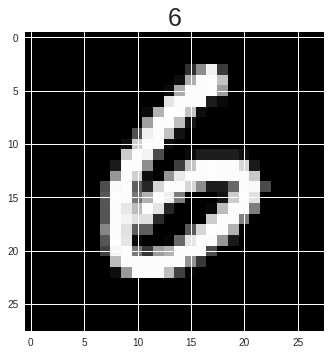

In [0]:
# Load Train and test dataset and normalize them
df_train = pd.read_csv("/content/gdrive/My Drive/train1.csv")
x_train = np.array(df_train.iloc[:,1:])
x_train = np.array([np.reshape(i, (28, 28, 1)) for i in x_train])
y_train = np.array(df_train.iloc[:,0])

x_train = x_train/255.0
y_train = keras.utils.to_categorical(y_train)

df_test = pd.read_csv("/content/gdrive/My Drive/test1.csv")
x_test = np.array(df_test)
x_test = np.array([np.reshape(i, (28, 28, 1)) for i in x_test])
x_test = x_test/255.0

print(x_train.shape, y_train.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
# Plot a sample image with label
img_num = 8008
plt.imshow(x_train[img_num][:,:,0], cmap='gray')
plt.title(np.argmax(y_train[img_num]), fontsize=25)
plt.show()


In [0]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), kernel_initializer='random_uniform', padding='same', activation='relu', input_shape=(X_train.shape[1:])))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), kernel_initializer='random_uniform', padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(5,5), kernel_initializer='random_uniform', padding='same', activation='relu'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(5,5), kernel_initializer='random_uniform', padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=128, kernel_size=(7,7), kernel_initializer='random_uniform', padding='same', activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(7,7), kernel_initializer='random_uniform', padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))

model.add(keras.layers.Conv2D(filters=256, kernel_size=(7,7), padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=100, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=y_train.shape[1], activation='softmax'))

model.summary()
# Configure and train the model
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train,  batch_size=500, epochs=13, validation_data=(X_test,Y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxP

Text(0.5, 1.0, 'Accuracy Curves')

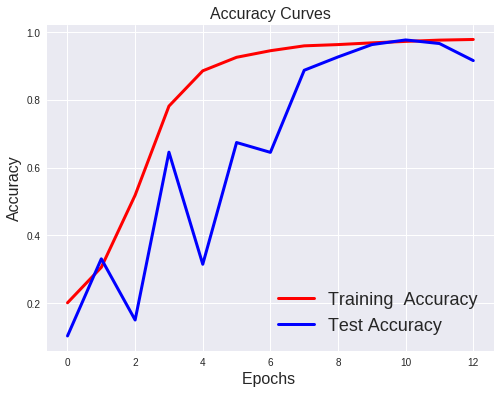

In [6]:
# Plot the model Accuracy graph
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training  Accuracy', 'Test Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


In [0]:
# Predictions for the given test case
img_id = []
label = []
for i in range(len(x_test)):
    img_id.append(i+1)
    label.append(np.argmax(model.predict(x_test[i:i+1])))
    
img_id = np.array(img_id)
label = np.array(label)
# Convert to pandas dataframe and convert to submission file
op_df = pd.DataFrame()
op_df['ImageId'] = img_id
op_df['Label'] = label
op_df.to_csv("/content/gdrive/My Drive/submission.csv", index=False)